In [82]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
mush_data = pd.read_csv('training_mush.csv')
mush_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [29]:
X = mush_data.drop('class', axis=1)
y = mush_data['class']
len(list(X))

22

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_rf = RandomForestClassifier(random_state=0)

parametrs = {'n_estimators': [10,20,30,40,50], 'max_depth': [1,3,5,7,9,11], \
             'min_samples_leaf':[1,2,3,4,5,6,7], 'min_samples_split':[2,4,6,8]}

grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [31]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [32]:
best_clf = grid_search_cv_clf.best_estimator_
#лучшие фичи приводящие к большим изменениям
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [50]:
mush_test_data = pd.read_csv('testing_mush.csv')
mush_test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [51]:
X_test = mush_test_data

In [52]:
y = best_clf.predict(X_test)

In [96]:
pd.Series(y).value_counts()

0    1055
1     976
dtype: int64

In [107]:
y_pred = pd.read_csv('y_pred/testing_y_mush.csv').to_numpy()
y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [108]:
y

array([0, 0, 1, ..., 1, 0, 1])

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred, y)

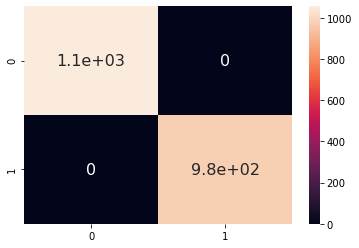

In [111]:
import seaborn as sns

sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16})

In [135]:
invasion_data = pd.read_csv('invasion.csv')
invasion_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [136]:
operative_information = pd.read_csv('operative_information.csv')
operative_information.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [137]:
X = invasion_data.drop('class', axis=1)
y = invasion_data['class']

In [138]:
clf_rf = RandomForestClassifier(random_state=0)

parametrs = {'n_estimators': [10,20,30,40,50], 'max_depth': [1,3,5], \
             'min_samples_leaf':[1,2,3], 'min_samples_split':[2,4]}

grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [139]:
grid_search_cv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [140]:
best_clf = grid_search_cv_clf.best_estimator_

In [141]:
y_pred = best_clf.predict(operative_information)

In [142]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [143]:
best_clf = grid_search_cv_clf.best_estimator_
#лучшие фичи приводящие к большим изменениям
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


In [148]:
space_data = pd.read_csv('space_can_be_a_dangerous_place.csv')
space_data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [149]:
X = space_data.drop('dangerous', axis=1)
y = space_data.dangerous

In [150]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [151]:
grid_search_cv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [152]:
best_clf = grid_search_cv_clf.best_estimator_

In [153]:
best_clf = grid_search_cv_clf.best_estimator_
#лучшие фичи приводящие к большим изменениям
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,buggers_were_noticed,0.480396
6,nearby_system_has_planemo,0.456834
4,black_hole_is_near,0.046924
3,dustiness,0.006054
2,peradventure_index,0.005124
0,r,0.002666
1,phi,0.002002
